In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt200_s1.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,0.001748,0.000804,0.091593,0.260363,0.009699,-0.009958,2.562381,0.116498,0.094974,...,0.124308,0.089357,-0.091056,-0.360373,0.547365,-0.836894,-0.992651,0.121015,-0.408787,0.912630
1,1,0.003416,0.001920,0.100946,0.279396,0.033422,-0.021945,2.397414,0.156637,0.092143,...,0.135676,0.079492,-0.071883,-0.368562,0.677368,-0.735644,-0.992651,0.121015,-0.375261,0.926919
2,2,0.006341,0.002866,0.108760,0.296987,0.039580,-0.026140,2.171237,0.286917,0.078522,...,0.129155,0.000795,-0.001148,-0.546713,0.825087,-0.565006,-0.992651,0.121015,-0.352582,0.935781
3,3,0.010030,0.003906,0.114313,0.318679,0.037068,-0.025548,1.922680,0.320219,0.095813,...,0.172304,-0.011710,0.016822,-0.553349,0.938725,-0.344667,-0.992651,0.121015,-0.333435,0.942773
4,4,0.013932,0.005213,0.117356,0.347049,0.031873,-0.023747,1.674159,0.326269,0.122092,...,0.221316,-0.018972,0.019622,-0.551704,0.994663,-0.103179,-0.992651,0.121015,-0.311899,0.950115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,-0.432236,-1.532856,0.062044,0.298855,-0.347073,-0.369477,20.232845,0.251531,0.031633,...,-0.217950,0.162532,-0.089970,-0.002685,0.982472,0.186410,-0.002810,-0.999996,0.932768,-0.360478
3996,3996,-0.429155,-1.532627,0.062602,0.289181,-0.291281,-0.386584,20.232485,0.262078,0.007229,...,-0.187875,0.174166,-0.103875,0.000443,0.982405,0.186764,-0.002810,-0.999996,0.951763,-0.306835
3997,3997,-0.425930,-1.532692,0.062675,0.286153,-0.233478,-0.403193,20.233147,0.275479,-0.017793,...,-0.159213,0.188960,-0.114900,0.002630,0.982528,0.186114,-0.002810,-0.999996,0.968449,-0.249213
3998,3998,-0.422584,-1.533050,0.062417,0.289701,-0.173948,-0.419567,20.235739,0.247993,-0.035769,...,-0.115593,0.172706,-0.115584,0.026748,0.983007,0.183567,-0.002810,-0.999996,0.982194,-0.187867


(4000, 45)

Text(0.5, 0, 'Time (s)')

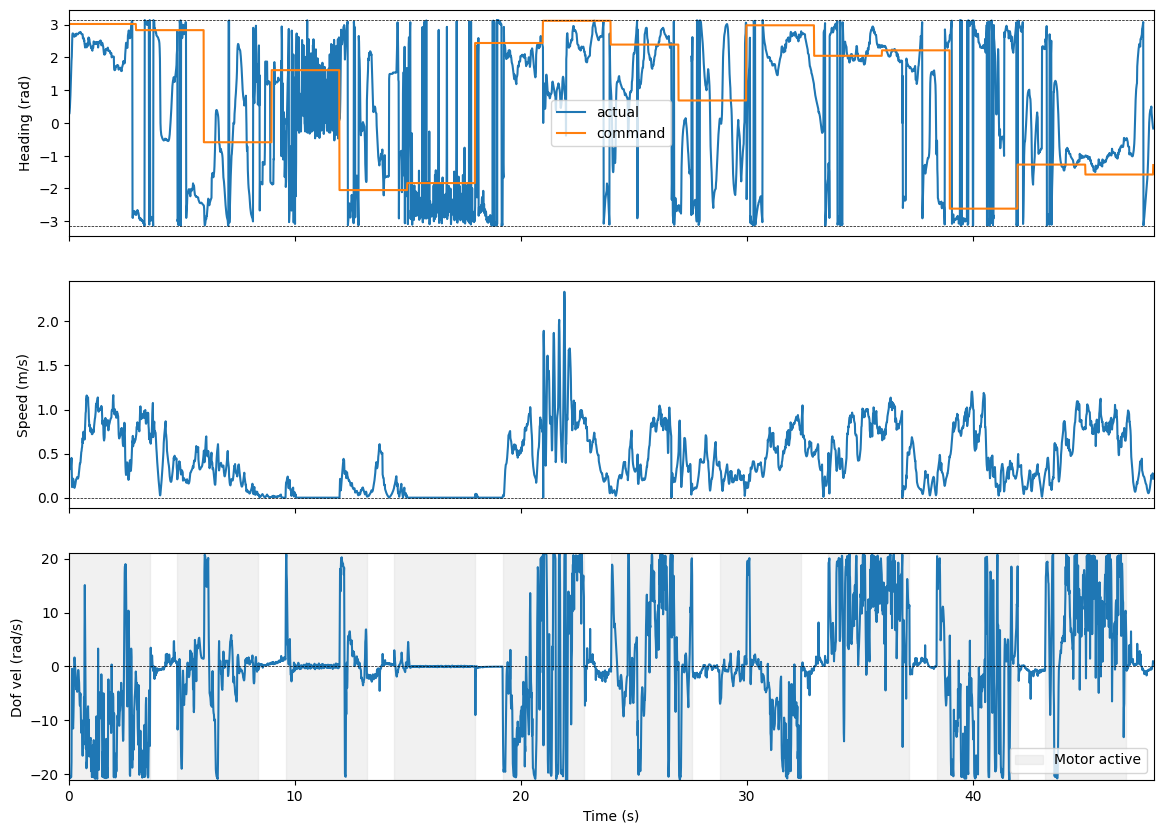

In [6]:
dt = 0.012
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)

des_heading = np.arctan2(df['obs12'], df['obs11']) 

# heading = np.unwrap(heading)
# diff = heading - des_heading
# wrapped_diff = (diff+np.pi)//(2*np.pi)
# # Add the wrapped difference back to angle2
# des_heading = des_heading + wrapped_diff*2*np.pi

fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,10))
axs[0].plot(np.arange(len(df))*dt, heading, label='actual')
axs[0].plot(np.arange(len(df))*dt, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*dt, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*dt, df['obs8']*37.5)
# axs[2].plot(np.arange(len(df))*dt, df['action'])
# axs[2].plot(np.arange(len(df))*dt, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylabel('Dof vel (rad/s)')
axs[2].set_xlim(0,len(df)*dt)

# Create mask for the colored region
episode_length = np.arange(len(df))
mask = ((episode_length % 400) > 0) & ((episode_length % 400) <= 300)

# Plot shaded region
axs[2].fill_between(np.arange(len(df))*dt, -100, 100, 
                    where=mask, 
                    color='lightgray', 
                    alpha=0.3,
                    label='Motor active')
axs[2].set_ylim(-21, 21) # Set reasonable y-limits
axs[2].legend()



axs[-1].set_xlabel('Time (s)')

(0.0, 48.0)

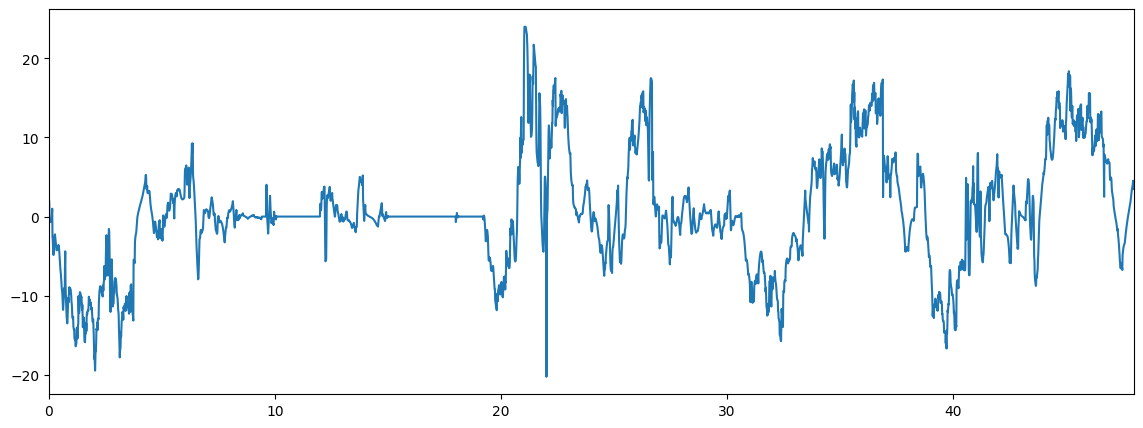

In [10]:
rollangvel = df['obs6']*24
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(df))*dt, rollangvel)
plt.xlim(0, len(df)*dt)

/tmp/ipykernel_1754246/529650738.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,2000)


(2.7715149851215166, 2000)

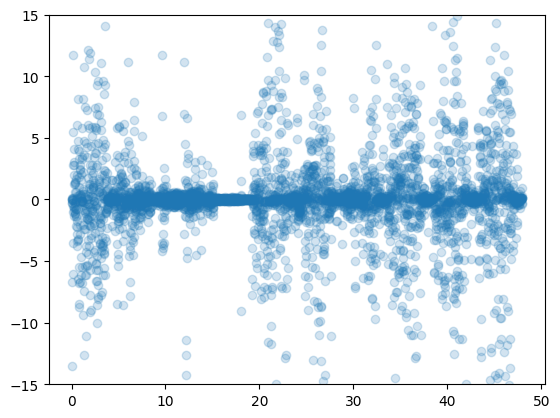

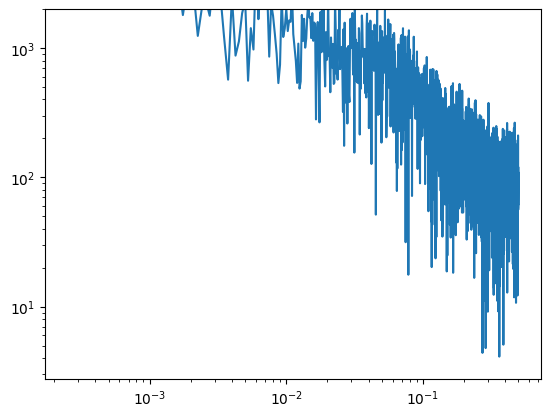

In [7]:
dofvel = df['obs8']*37.5
diffdofvel = np.diff(dofvel,prepend=0)

energy = diffdofvel**2
energy = np.cumsum(energy)

plt.figure()
plt.scatter(np.arange(len(df))*dt, diffdofvel, alpha=0.2)
plt.ylim(-15,15)

#FFT of dofvel
fft = np.fft.fft(dofvel)
frequencies = np.fft.fftfreq(len(dofvel))
plt.figure()
# plt.plot(frequencies, np.abs(fft))
#just the positive frequencies
plt.plot(frequencies[frequencies>0], np.abs(fft[frequencies>0]))
#make loglog
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,2000)

